# Top 5000 Highest Rated Movies on IMDB

#### Used dataset: https://www.kaggle.com/datasets/tiagoadrianunes/imdb-top-5000-movies

### Imports

In [12]:
import pandas as pd, numpy as np, seaborn as sb, matplotlib.pyplot as mpl, hashlib

### Data Loading

In [14]:
def load_csv(file_path, na_values=['NA']):
    df = pd.read_csv(file_path, index_col=None, na_values=na_values)
    return df

In [15]:
csv_file_path = '../Data/results_with_crew.csv'
dataframe = load_csv(csv_file_path)

In [16]:
dataframe

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3029801,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2114686,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3006220,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2069149,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""..."
4,tt0108052,Schindler's List,1993,5,9.0,1516036,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,tt0891527,Lions for Lambs,2007,4996,6.2,54138,92,Robert Redford,Matthew Michael Carnahan,"Crime, Drama, Mystery","<a href=""https://www.imdb.com/title/tt0891527""...","<a href=""https://www.imdb.com/title/tt0891527""..."
4996,tt0880578,Untraceable,2008,4997,6.2,54012,101,Gregory Hoblit,"Robert Fyvolent, Mark Brinker, Allison Burnett","Crime, Mystery, Thriller","<a href=""https://www.imdb.com/title/tt0880578""...","<a href=""https://www.imdb.com/title/tt0880578""..."
4997,tt27459160,Teri Baaton Mein Aisa Uljha Jiya,2024,4998,6.2,53986,141,"Amit Joshi, Aradhana Sah","Amit Joshi, Aradhana Sah","Comedy, Drama, Romance","<a href=""https://www.imdb.com/title/tt27459160...","<a href=""https://www.imdb.com/title/tt27459160..."
4998,tt3174376,Before I Wake,2016,4999,6.2,53940,97,Mike Flanagan,"Mike Flanagan, Jeff Howard","Drama, Fantasy, Horror","<a href=""https://www.imdb.com/title/tt3174376""...","<a href=""https://www.imdb.com/title/tt3174376""..."


In [17]:
dataframe.shape

(5000, 12)

In [18]:
dataframe.head(3)

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3029801,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2114686,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3006220,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."


In [19]:
dataframe.tail(3)

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
4997,tt27459160,Teri Baaton Mein Aisa Uljha Jiya,2024,4998,6.2,53986,141,"Amit Joshi, Aradhana Sah","Amit Joshi, Aradhana Sah","Comedy, Drama, Romance","<a href=""https://www.imdb.com/title/tt27459160...","<a href=""https://www.imdb.com/title/tt27459160..."
4998,tt3174376,Before I Wake,2016,4999,6.2,53940,97,Mike Flanagan,"Mike Flanagan, Jeff Howard","Drama, Fantasy, Horror","<a href=""https://www.imdb.com/title/tt3174376""...","<a href=""https://www.imdb.com/title/tt3174376""..."
4999,tt5177088,The Girl in the Spider's Web,2018,5000,6.1,53873,115,Fede Alvarez,"Jay Basu, Fede Alvarez, Steven Knight, Stieg L...","Action, Adventure, Crime","<a href=""https://www.imdb.com/title/tt5177088""...","<a href=""https://www.imdb.com/title/tt5177088""..."


In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   rank             5000 non-null   int64  
 4   averageRating    5000 non-null   float64
 5   numVotes         5000 non-null   int64  
 6   runtimeMinutes   5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          4974 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [21]:
dataframe.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link'],
      dtype='object')

In [22]:
dataframe['numVotes'].head(10)

0    3029801
1    2114686
2    3006220
3    2069149
4    1516036
5    1423318
6     920152
7    2324646
8    2098940
9    2670665
Name: numVotes, dtype: int64

In [23]:
dataframe.describe()

,startYear,rank,averageRating,numVotes,runtimeMinutes
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,2002.021800,2500.500000,7.137480,1.630371e+05,114.568000
std,18.263517,1443.520003,0.597062,2.404189e+05,23.218088
min,1915.000000,1.000000,5.900000,2.500200e+04,25.000000
25%,1994.000000,1250.750000,6.700000,4.008625e+04,99.000000
50%,2007.000000,2500.500000,7.100000,7.439350e+04,111.000000
75%,2015.000000,3750.250000,7.600000,1.781035e+05,126.000000
max,2025.000000,5000.000000,9.300000,3.029801e+06,374.000000


### Data Cleaning

In [25]:
dataframe.isna().sum()

tconst              0
primaryTitle        0
startYear           0
rank                0
averageRating       0
numVotes            0
runtimeMinutes      0
directors           0
writers            26
genres              0
IMDbLink            0
Title_IMDb_Link     0
dtype: int64

In [26]:
df_cleaned = dataframe.dropna()

In [27]:
df_cleaned.shape

(4974, 12)

In [28]:
df_cleaned.isna().sum()

tconst             0
primaryTitle       0
startYear          0
rank               0
averageRating      0
numVotes           0
runtimeMinutes     0
directors          0
writers            0
genres             0
IMDbLink           0
Title_IMDb_Link    0
dtype: int64

### Data Anonymisation

In [30]:
# replacing entries in chosen column with unique hashcodes (recurring writers get same hashcode)
def anonymize_column(df, column_name):
    df[column_name] = df[column_name].apply(
        lambda x: hashlib.sha256(x.encode()).hexdigest() if pd.notnull(x) else x
    )
    return df

In [31]:
df_anonymised = anonymize_column(dataframe, 'writers')

In [32]:
df_anonymised.head(3)

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3029801,142,Frank Darabont,d3535359f00990d2a5756d0fb5623d2b121e8c88d5652b...,Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2114686,175,Francis Ford Coppola,3eeb4fb28709dc533b1d01faadfda417449e7032a5cb6c...,"Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3006220,152,Christopher Nolan,9d592b4a4c3fc04607f53f7bc79cf3166187ef3b7f2ea2...,"Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."


### Visualisation Techniques

##### Genres

In [35]:
# Split genres by , to ensure we catch multiple genres with each on its own row
genres = dataframe['genres'].dropna().str.split(',').explode()

In [36]:
# Count occurences of each genre, to find the top 10 most common
genre_counts = genres.value_counts().head(10)

C:\Users\nifje\AppData\Local\Temp\ipykernel_27796\1315583929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis', legend=False)


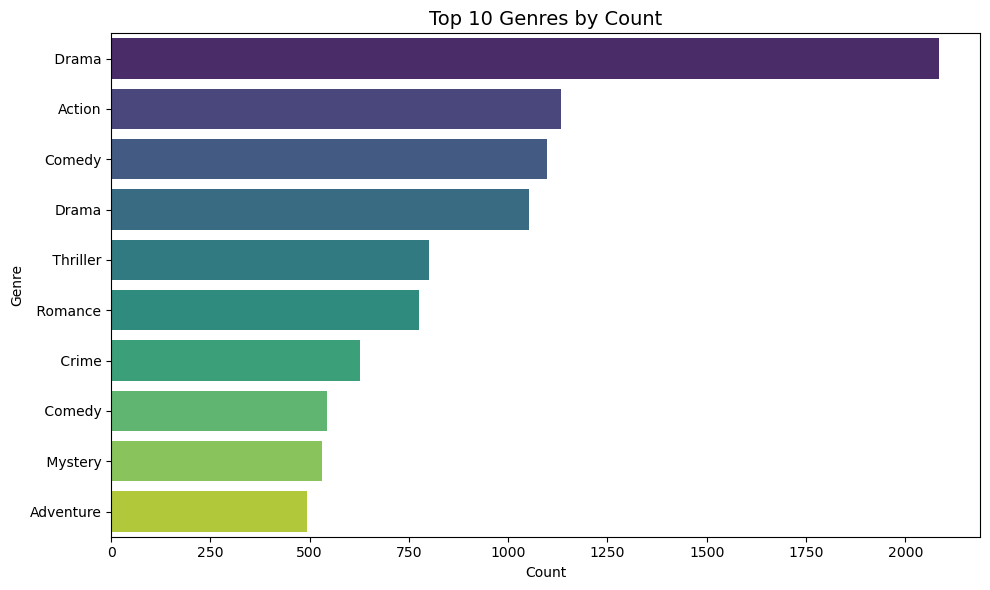

In [37]:
# Plot the data for visual presentation
mpl.figure(figsize=(10, 6))
sb.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis', legend=False)
mpl.title('Top 10 Genres by Count', fontsize=14)
mpl.xlabel('Count')
mpl.ylabel('Genre')
mpl.tight_layout()
mpl.show()

##### Directors

In [39]:
# New df with only directors and avg rating
director_ratings_df = dataframe[['directors', 'averageRating']].dropna()

In [40]:
# GroupBy director and calculate avg rating and number of movies (to later exclude one-hit wonders and keep established directors)
director_stats = director_ratings_df.groupby('directors').agg(
    average_rating=('averageRating', 'mean'),
    movie_count=('averageRating', 'count')
)

In [41]:
# Directors must have a minimum of 3 movies to their name
director_stats_filtered = director_stats[director_stats['movie_count'] >= 3]

In [42]:
# Find the top 20 by avg rating
top_directors = director_stats_filtered.sort_values(by='average_rating', ascending=False).head(20)

C:\Users\nifje\AppData\Local\Temp\ipykernel_27796\913926641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


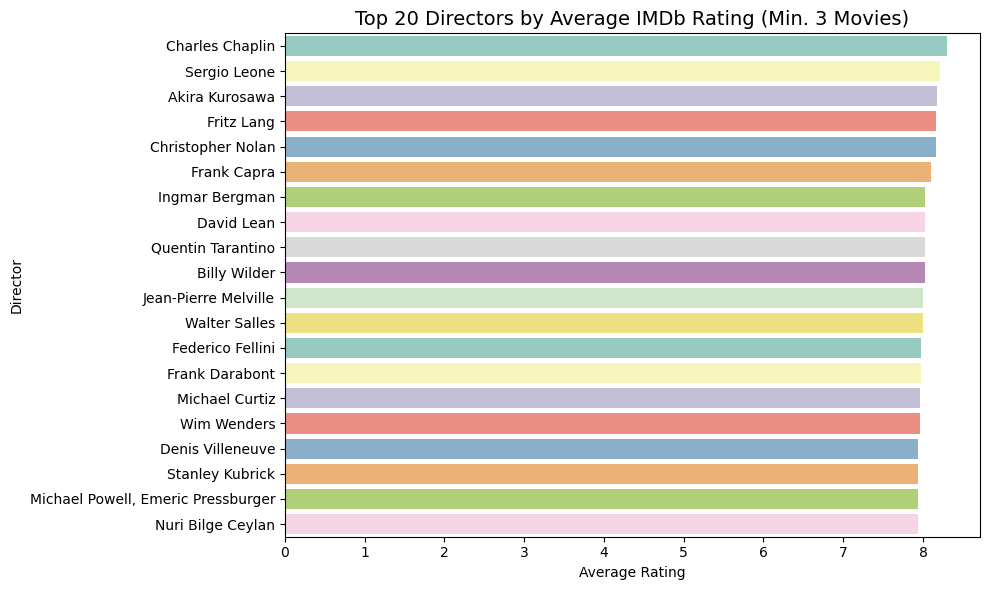

In [43]:
# Plot the data for visual presentation
mpl.figure(figsize=(10, 6))
sb.barplot(
    x=top_directors['average_rating'],
    y=top_directors.index,
    palette='Set3',
    legend=False
)
mpl.title('Top 20 Directors by Average IMDb Rating (Min. 3 Movies)', fontsize=14)
mpl.xlabel('Average Rating')
mpl.ylabel('Director')
mpl.tight_layout()
mpl.show()

##### Chose not to include Data Inputing as the only missign data entries were a few missing writers. Didn't make sense to "fill" those out with random values.